## Creating Correlation Matrices in Python with NumPy and Pandas
This is the code for the blog post about how to create a [Python correlation matrix](https://www.marsja.se/correlation-matrix-python-numpy-pandas).

Note, the data should be stored in a subfolder called 'SimData' (or you'll need to change the string with the location of the data file, below).

### 1. NumPy

In [1]:
import numpy as np

data = './SimData/correlationMatrixPython.csv'

x = np.loadtxt(data, skiprows=1, delimiter=',',
              unpack=True)

np.corrcoef(x)

array([[1.        , 0.38322543, 0.4033913 , 0.43527164],
       [0.38322543, 1.        , 0.94319646, 0.17686429],
       [0.4033913 , 0.94319646, 1.        , 0.15407927],
       [0.43527164, 0.17686429, 0.15407927, 1.        ]])

### 2. Pandas

In [2]:
import pandas as pd

data = './SimData/correlationMatrixPython.csv'

df = pd.read_csv(data)

df.corr()

,a,b,c,d
a,1.000000,0.383225,0.403391,0.435272
b,0.383225,1.000000,0.943196,0.176864
c,0.403391,0.943196,1.000000,0.154079
d,0.435272,0.176864,0.154079,1.000000


#### Spearman with Pandas:

In [3]:
df.corr(method='spearman')

,a,b,c,d
a,1.000000,0.298602,0.338962,0.397516
b,0.298602,1.000000,0.936370,0.131449
c,0.338962,0.936370,1.000000,0.105359
d,0.397516,0.131449,0.105359,1.000000


## Correlation Tables

In [4]:
cormat = df.corr()

In [5]:
import numpy as np

def triang(cormat, triang='lower'):
    
    if triang == 'upper':
        rstri = pd.DataFrame(np.triu(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,1:]
        rstri.drop(rstri.tail(1).index, inplace=True)
        
    if triang == 'lower':
        rstri = pd.DataFrame(np.tril(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,:-1]
        rstri.drop(rstri.head(1).index, inplace=True) 
 
    rstri.replace(to_replace=[0,1], value='', inplace=True)
    
    return(rstri)

triang(cormat, triang='upper')

,b,c,d
a,0.383,0.403,0.435
b,,0.943,0.177
c,,,0.154


## Bonus: Creating the Heatmap from the Post

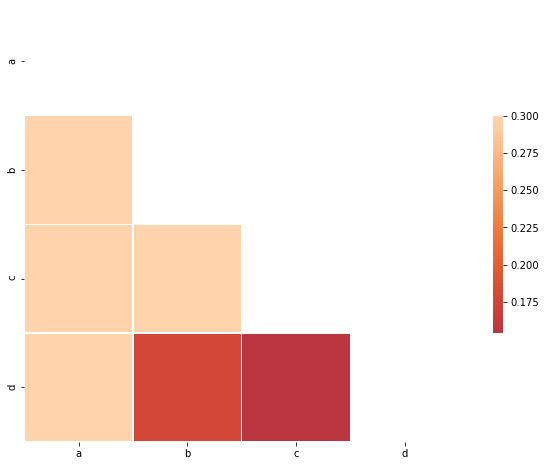

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig = plt.figure(figsize=(12, 8))
sns.heatmap(cormat, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})